In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Define file paths for Bottom Tier and Top Tier datasets
file_paths = {
    "Bottom_Tier": "updated-zillow-price/HomeValues(ZHVI)/City_ZHVI_All_Homes_Bottom_tier_time_series.csv",
    "Top_Tier": "updated-zillow-price/HomeValues(ZHVI)/City_ZHVI_All_Homes_Top_tier_time_series.csv"
}

In [5]:
# Load the data and preview it
bottom_tier_df = pd.read_csv(file_paths["Bottom_Tier"])
top_tier_df = pd.read_csv(file_paths["Top_Tier"])

# Display the first few rows of each dataset
print("Bottom Tier Data:")
display(bottom_tier_df.head(3))

print("\nTop Tier Data:")
display(top_tier_df.head(3))

Bottom Tier Data:


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,135938.093262,136672.233081,...,461923.166998,463171.318404,465953.643715,469142.548055,472480.005497,474590.610662,477165.895357,480334.424266,483028.450059,485195.514445
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,120410.861777,120614.264869,...,668843.532299,664215.199498,659210.586511,657311.420982,657638.408837,657739.438926,660053.626985,664284.651174,670006.775231,674549.647456
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,55418.285342,55415.860445,...,183825.841226,184258.721736,185029.555794,185921.642130,186638.607863,186682.894332,186135.499489,185318.397157,184377.989756,183498.816489



Top Tier Data:


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,614413.472712,617772.048290,...,1.335844e+06,1.335482e+06,1.339964e+06,1.345716e+06,1.350540e+06,1.350240e+06,1.350597e+06,1.352696e+06,1.356184e+06,1.358380e+06
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,424997.704968,425616.915266,...,1.686668e+06,1.669100e+06,1.652783e+06,1.645160e+06,1.643073e+06,1.637440e+06,1.637274e+06,1.642561e+06,1.654145e+06,1.662113e+06
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,223689.361591,223655.019919,...,4.589952e+05,4.603469e+05,4.622704e+05,4.643360e+05,4.655674e+05,4.656578e+05,4.650730e+05,4.646022e+05,4.649419e+05,4.654256e+05


In [10]:
# Function to filter the dataset for Boulder, CO
def filter_boulder_data(df):
    # Filter for Boulder, CO
    boulder_data = df[(df["RegionName"] == "Boulder") & (df["State"] == "CO")]

    # If no data found
    if boulder_data.empty:
        print("No data found for Boulder, CO.")
        return None

    # Extract columns that match the time-series format (e.g., 'YYYY-MM-DD' or 'YYYY-MM')
    date_columns = boulder_data.columns[7:]
    valid_date_columns = [col for col in date_columns if col.startswith("20")]

    # Create time-series data
    time_series = boulder_data[valid_date_columns].T  # Transpose to get time-series
    time_series.columns = ["Price"]  # Set column name
    time_series.index = pd.to_datetime(valid_date_columns, format='%Y-%m-%d', errors='coerce')  # Explicit format
    return time_series

# Filter data for Boulder, CO in Bottom Tier and Top Tier datasets
boulder_bottom_tier = filter_boulder_data(bottom_tier_df)
boulder_top_tier = filter_boulder_data(top_tier_df)

# Display the filtered Boulder time-series data
print("Boulder Bottom Tier Time-Series Data:")
print(boulder_bottom_tier.head())

print("\nBoulder Top Tier Time-Series Data:")
print(boulder_top_tier.head())


Boulder Bottom Tier Time-Series Data:
                    Price
2000-01-31  149254.622015
2000-02-29  149902.154903
2000-03-31  150707.974410
2000-04-30  152410.359014
2000-05-31  154331.340536

Boulder Top Tier Time-Series Data:
                    Price
2000-01-31  488939.691554
2000-02-29  490760.819223
2000-03-31  493239.606539
2000-04-30  498567.510918
2000-05-31  504742.094134


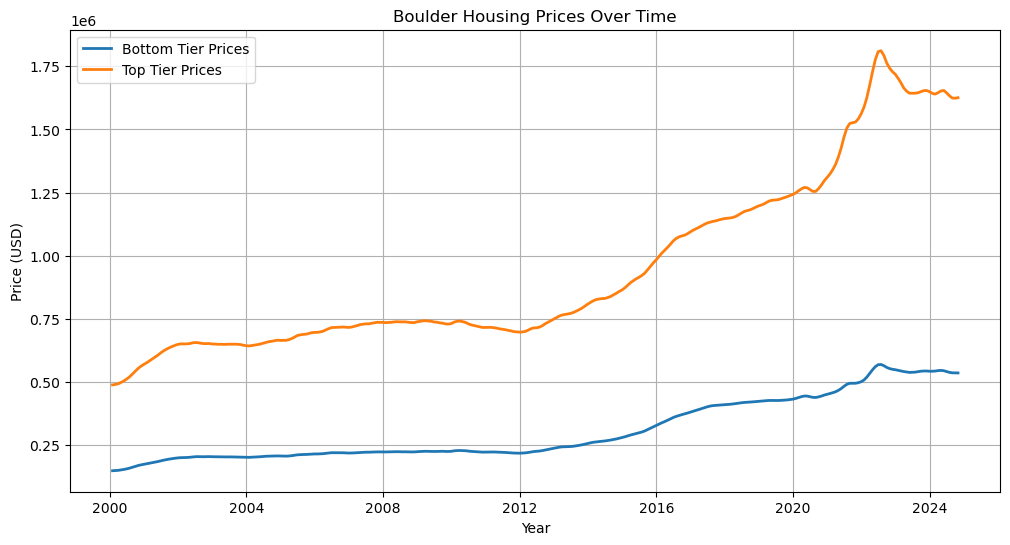

In [11]:

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(boulder_bottom_tier.index, boulder_bottom_tier["Price"], label="Bottom Tier Prices", linewidth=2)
plt.plot(boulder_top_tier.index, boulder_top_tier["Price"], label="Top Tier Prices", linewidth=2)
plt.title("Boulder Housing Prices Over Time")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()